Loading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
df_0 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4nwin_nm_blncd.csv")

In [3]:
df_0.head()

,prov_char,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,652.786,...,3998.194,3998.676,3999.158,3999.64,4000.122,tgp_name,dgp_name,fgp_name,country_name,thnoth_name
0,KTX,ID,ID-KTX-068-2306-010_002,0.009999,0.010936,0.012060,0.013193,0.014161,0.014829,0.015131,...,-0.000237,-0.000224,-0.000193,-0.000141,-0.000068,Group 3,Group 2,Group 4,Indonesia,Non-Thai
1,KBX,ID,ID-KBX-068-2307-015_002_adah2opik,0.011787,0.012684,0.013509,0.014131,0.014446,0.014396,0.013982,...,0.000856,0.000782,0.000682,0.000577,0.000490,Group 3,Group 2,Group 4,Indonesia,Non-Thai
2,SUX,ID,ID-SUX-073-2311-001_005,0.018855,0.018050,0.017008,0.015901,0.014902,0.014138,0.013663,...,0.000310,0.000339,0.000396,0.000478,0.000577,Group 3,Group 2,Group 3,Indonesia,Non-Thai
3,KTX,ID,ID-KTX-068-2306-002_005,0.013460,0.013085,0.013149,0.013695,0.014654,0.015859,0.017094,...,-0.000523,-0.000566,-0.000579,-0.000557,-0.000494,Group 3,Group 2,Group 4,Indonesia,Non-Thai
4,KTX,ID,ID-KTX-068-2308-035_004,0.011486,0.011184,0.010776,0.010319,0.009914,0.009674,0.009681,...,-0.002519,-0.002572,-0.002616,-0.002649,-0.002678,Group 3,Group 2,Group 4,Indonesia,Non-Thai


Selecting Regions of Interest

In [4]:
# Define the regions of interest
regions_of_interest = [
    (2986, 3026), (2933, 2973), (2902, 2942), (2833, 2873),
    (1480, 2020), (1445, 1485), (1398, 1438), (1358, 1398),
    (1215, 1255), (1140, 1180), (1096, 1136), (1078, 1118),
    (1000, 910), (702, 742)
]

# Extract columns corresponding to the regions of interest
columns_to_focus = []
for start, end in regions_of_interest:
    columns_to_focus.extend([col for col in df_0.columns[4:-5] if start <= float(col) <= end])

# Create a new DataFrame with the selected regions
df_0_selected_regions = df_0[columns_to_focus]

# Combine the selected regions with the target column and other relevant columns
df_0_selected_regions = pd.concat([df_0[['thnoth_name', 'prov_char']], df_0_selected_regions], axis=1)

# Save the DataFrame for further processing
#df_0_selected_regions.to_csv('data/data file 2/data_1.csv', index=False)


In [5]:
df_0_selected_regions = pd.read_csv('data/data file 2/data_1.csv')
df_baseline_corrected = pd.read_csv('data/data file 2/data_1_bslcrct.csv')
df_smoothed = pd.read_csv('data/data file 2/data_1_smoothed.csv')
df_normalized = pd.read_csv('data/data file 2/data_1_normalized.csv')
df_1st_derivative = pd.read_csv('data/data file 2/data_1_1_der.csv')
df_2nd_derivative = pd.read_csv('data/data file 2/data_1_2_der.csv')
df_1_der_savgol = pd.read_csv('data/data file 2/data_1_1_der_savgol.csv')
df_2_der_savgol = pd.read_csv('data/data file 2/data_1_2_der_savgol.csv')
df_snv = pd.read_csv('data/data file 2/data_1_snv.csv')
df_rnv = pd.read_csv('data/data file 2/data_1_rnv.csv')

Step-by-Step Implementation for RandomForest Classifier with Hyperparameter Tuning

Load the Smoothed Dataset

In [6]:
# Load the smoothed dataset
df_norm_v0w = pd.read_csv('data/data file 2/data_1_normalized.csv')

In [7]:
df_norm_v0w.head()

,tgp_name,prov_char,2986.231,2986.713,2987.195,2987.677,2988.159,2988.641,2989.124,2989.606,...,737.639,738.121,738.603,739.085,739.567,740.049,740.531,741.013,741.496,741.978
0,Group 1,SNK,0.680361,0.649382,0.626292,0.606902,0.597618,0.601738,0.617279,0.641703,...,0.568438,0.675984,0.705713,0.717384,0.723031,0.721467,0.710428,0.639134,0.575208,0.524265
1,Group 1,SNK,0.327412,0.305093,0.296126,0.287489,0.286577,0.294955,0.307498,0.321463,...,0.495835,0.563771,0.565639,0.556583,0.546861,0.535541,0.521082,0.490974,0.465943,0.442909
2,Group 1,CBI,0.044833,0.031225,0.033697,0.032729,0.037283,0.048466,0.059318,0.067346,...,0.453377,0.484901,0.461528,0.432242,0.403211,0.371309,0.333570,0.320349,0.315302,0.308776
3,Group 1,SNK,0.149469,0.141683,0.148768,0.153171,0.161823,0.174130,0.182580,0.184419,...,0.521343,0.539324,0.506585,0.476490,0.455250,0.440705,0.431656,0.431650,0.435063,0.433289
4,Group 1,CBI,0.173008,0.175463,0.191576,0.203181,0.216537,0.231576,0.242502,0.248015,...,0.495342,0.500280,0.461017,0.428564,0.408222,0.397528,0.394413,0.406769,0.416972,0.414441


Define the Target Variable and Features

In [8]:
# Define the target_v0w variable and feature columns
target_v0w = 'tgp_name'
features_v0w = df_norm_v0w.columns.difference(['tgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

RandomForest Classification and Evaluation with LOGO-CV

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the RandomForest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV RandomForest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.6022528524107471
Leave-One-Group-Out CV RandomForest Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.59      0.60      0.60        65
     Group 2       0.44      0.48      0.46        65
     Group 3       0.53      0.48      0.50        65

    accuracy                           0.52       195
   macro avg       0.52      0.52      0.52       195
weighted avg       0.52      0.52      0.52       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       39       17        9
Group 2       16       31       18
Group 3       11       23       31
Class: Group 1
precision: 0.5909090909090909
recall: 0.6
f1-score: 0.5954198473282443
support: 65.0

Class: Group 2
precision: 0.43661971830985913
recall: 0.47692307692307695
f1-score: 0.45588235294117646
support: 65.0

Class: Group 3
precision: 0.5344827586206896
recall: 0.47692307692307695
f1-score: 0.5040650406504065
support:

Implementing Different Classifiers on the Smoothed Dataset

In [10]:
import pandas as pd

# Define the target variable and feature columns
target_v0w = 'tgp_name'
features_v0w = df_norm_v0w.columns.difference(['tgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Define the Evaluation Function

In [11]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

def classify_and_evaluate_logo_cv(model, X, y, groups, class_labels):
    # Initialize LOGO-CV
    logo = LeaveOneGroupOut()

    # Initialize lists to store results
    accuracies = []
    y_true_all = []
    y_pred_all = []

    # Perform LOGO-CV
    for train_index, test_index in logo.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict the test samples
        y_test_pred = model.predict(X_test)

        # Calculate and store test accuracies
        accuracies.append(accuracy_score(y_test, y_test_pred))

        # Store the prediction and actual value
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)

    # Calculate average accuracies
    avg_accuracy = np.mean(accuracies)

    print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

    # Generate the classification report for the overall test predictions
    report_logo = classification_report(y_true_all, y_pred_all, target_names=class_labels, output_dict=True)
    print(f"Leave-One-Group-Out CV {model.__class__.__name__} Classification Report")
    print(classification_report(y_true_all, y_pred_all, target_names=class_labels))

    # Print the confusion matrix in text format
    conf_matrix = confusion_matrix(y_true_all, y_pred_all)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
    print("Confusion Matrix:")
    print(conf_matrix_df)

    # Print the detailed results
    for class_name, metrics in report_logo.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_name}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{class_name}: {metrics}")
        print()


Implement and Evaluate Each Classifier

Support Vector Machine (SVM)

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0w = 'tgp_name'
features_v0w = df_norm_v0w.columns.difference(['tgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier with different kernel
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies = []
y_true_all = []
y_pred_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Calculate and store test accuracies
    accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_accuracy = np.mean(accuracies)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {avg_accuracy}')

# Generate the classification report for the overall test predictions
report_svm_logo = classification_report(y_true_all, y_pred_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_all, y_pred_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

# Calculate the overall accuracy from the classification report
overall_accuracy_report = report_svm_logo['accuracy']
print(f'Overall Accuracy from Classification Report: {overall_accuracy_report}')

# Compare the accuracies
if np.isclose(avg_accuracy, overall_accuracy_report):
    print("The average test accuracy and overall accuracy from the classification report match.")
else:
    print("There is a discrepancy between the average test accuracy and overall accuracy from the classification report.")


Leave-One-Group-Out CV - Average Test Accuracy: 0.5040360282991861
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.39      0.26      0.31        65
     Group 2       0.33      0.49      0.39        65
     Group 3       0.49      0.40      0.44        65

    accuracy                           0.38       195
   macro avg       0.40      0.38      0.38       195
weighted avg       0.40      0.38      0.38       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       17       36       12
Group 2       18       32       15
Group 3        9       30       26
Class: Group 1
precision: 0.38636363636363635
recall: 0.26153846153846155
f1-score: 0.3119266055045872
support: 65.0

Class: Group 2
precision: 0.32653061224489793
recall: 0.49230769230769234
f1-score: 0.39263803680981596
support: 65.0

Class: Group 3
precision: 0.49056603773584906
recall: 0.4
f1-score: 0.4406779661016949
support: 65.0



In [13]:
# Define the target variable and feature columns
target_v0w = 'tgp_name'
features_v0w = df_norm_v0w.columns.difference(['tgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the SVM classifier
svm = SVC(kernel='rbf', random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_svm2_all = []
y_pred_svm2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    svm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = svm.predict(X_test)
    
    # Store the prediction and actual value
    y_true_svm2_all.extend(y_test)
    y_pred_svm2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_svm2_all, y_pred_svm2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_svm1_logo = classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV SVM Model Classification Report")
print(classification_report(y_true_svm2_all, y_pred_svm2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_svm2_all, y_pred_svm2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_svm1_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.38461538461538464
Leave-One-Group-Out CV SVM Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.39      0.26      0.31        65
     Group 2       0.33      0.49      0.39        65
     Group 3       0.49      0.40      0.44        65

    accuracy                           0.38       195
   macro avg       0.40      0.38      0.38       195
weighted avg       0.40      0.38      0.38       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       17       36       12
Group 2       18       32       15
Group 3        9       30       26
Class: Group 1
precision: 0.38636363636363635
recall: 0.26153846153846155
f1-score: 0.3119266055045872
support: 65.0

Class: Group 2
precision: 0.32653061224489793
recall: 0.49230769230769234
f1-score: 0.39263803680981596
support: 65.0

Class: Group 3
precision: 0.49056603773584906
recall: 0.4
f1-score: 0.4406779661016949
support: 65.0


Random Forest (RF) classifier

In [14]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_rf2_all = []
y_pred_rf2_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    rf.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = rf.predict(X_test)
    
    # Store the prediction and actual value
    y_true_rf2_all.extend(y_test)
    y_pred_rf2_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_rf2_all, y_pred_rf2_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Random Forest Model Classification Report")
print(classification_report(y_true_rf2_all, y_pred_rf2_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_rf2_all, y_pred_rf2_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.517948717948718
Leave-One-Group-Out CV Random Forest Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.59      0.60      0.60        65
     Group 2       0.44      0.48      0.46        65
     Group 3       0.53      0.48      0.50        65

    accuracy                           0.52       195
   macro avg       0.52      0.52      0.52       195
weighted avg       0.52      0.52      0.52       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       39       17        9
Group 2       16       31       18
Group 3       11       23       31
Class: Group 1
precision: 0.5909090909090909
recall: 0.6
f1-score: 0.5954198473282443
support: 65.0

Class: Group 2
precision: 0.43661971830985913
recall: 0.47692307692307695
f1-score: 0.45588235294117646
support: 65.0

Class: Group 3
precision: 0.5344827586206896
recall: 0.47692307692307695
f1-score: 0.5040650406504065
support:

Extra Trees (ET) classifier

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Define the target variable and feature columns
target_v0u = 'tgp_name'
features_v0u = df_norm_v0w.columns.difference(['tgp_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the Extra Trees classifier
et = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_et_all = []
y_pred_et_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    et.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = et.predict(X_test)
    
    # Store the prediction and actual value
    y_true_et_all.extend(y_test)
    y_pred_et_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_et_all, y_pred_et_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Extra Trees Model Classification Report")
print(classification_report(y_true_et_all, y_pred_et_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_et_all, y_pred_et_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.5025641025641026
Leave-One-Group-Out CV Extra Trees Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.60      0.58      0.59        65
     Group 2       0.43      0.54      0.48        65
     Group 3       0.49      0.38      0.43        65

    accuracy                           0.50       195
   macro avg       0.51      0.50      0.50       195
weighted avg       0.51      0.50      0.50       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       38       17       10
Group 2       14       35       16
Group 3       11       29       25
Class: Group 1
precision: 0.6031746031746031
recall: 0.5846153846153846
f1-score: 0.59375
support: 65.0

Class: Group 2
precision: 0.43209876543209874
recall: 0.5384615384615384
f1-score: 0.4794520547945205
support: 65.0

Class: Group 3
precision: 0.49019607843137253
recall: 0.38461538461538464
f1-score: 0.43103448275862066
suppo

k-Nearest Neighbors (kNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define the target variable and feature columns
target_v0u = 'tgp_name'
features_v0u = df_norm_v0w.columns.difference(['tgp_name', 'prov_char'])
X = df_norm_v0w[features_v0u]
y = df_norm_v0w[target_v0u]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize lists to store results
y_true_knn_all = []
y_pred_knn_all = []

# Perform LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = knn.predict(X_test)
    
    # Store the prediction and actual value
    y_true_knn_all.extend(y_test)
    y_pred_knn_all.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy = accuracy_score(y_true_knn_all, y_pred_knn_all)

print(f'Leave-One-Group-Out CV - Overall Test Accuracy: {overall_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV kNN Model Classification Report")
print(classification_report(y_true_knn_all, y_pred_knn_all, target_names=le.classes_))

# Print the confusion matrix in text format
conf_matrix = confusion_matrix(y_true_knn_all, y_pred_knn_all)
conf_matrix_df = pd.DataFrame(conf_matrix, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(conf_matrix_df)

# Print the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Overall Test Accuracy: 0.5076923076923077
Leave-One-Group-Out CV kNN Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.51      0.68      0.58        65
     Group 2       0.46      0.48      0.47        65
     Group 3       0.59      0.37      0.45        65

    accuracy                           0.51       195
   macro avg       0.52      0.51      0.50       195
weighted avg       0.52      0.51      0.50       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       44       16        5
Group 2       22       31       12
Group 3       20       21       24
Class: Group 1
precision: 0.5116279069767442
recall: 0.676923076923077
f1-score: 0.5827814569536424
support: 65.0

Class: Group 2
precision: 0.45588235294117646
recall: 0.47692307692307695
f1-score: 0.46616541353383456
support: 65.0

Class: Group 3
precision: 0.5853658536585366
recall: 0.36923076923076925
f1-score: 0.4528301886792453
sup

Gradient Boosting Classifier (GBC)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
model_gbc = GradientBoostingClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_gbc = []
y_true_all_gbc = []
y_pred_all_gbc = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_gbc.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_gbc.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_gbc.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_gbc.extend(y_test)
    y_pred_all_gbc.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_gbc = accuracy_score(y_true_all_gbc, y_pred_all_gbc)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_gbc}')
print("Leave-One-Group-Out CV GBC Model Classification Report")
report_gbc_logo = classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_gbc, y_pred_all_gbc, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_gbc = confusion_matrix(y_true_all_gbc, y_pred_all_gbc)
df_cm_gbc = pd.DataFrame(cm_logo_gbc, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_gbc)

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.5487179487179488
Leave-One-Group-Out CV GBC Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.57      0.54      0.56        65
     Group 2       0.45      0.51      0.47        65
     Group 3       0.65      0.60      0.62        65

    accuracy                           0.55       195
   macro avg       0.56      0.55      0.55       195
weighted avg       0.56      0.55      0.55       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       35       24        6
Group 2       17       33       15
Group 3        9       17       39
Class: Group 1
precision: 0.5737704918032787
recall: 0.5384615384615384
f1-score: 0.5555555555555556
support: 65.0

Class: Group 2
precision: 0.44594594594594594
recall: 0.5076923076923077
f1-score: 0.4748201438848921
support: 65.0

Class: Group 3
precision: 0.65
recall: 0.6
f1-score: 0.624
support: 65.0

accuracy: 0.5487179487179488

Cl

LightGBM (LGBM) classifier 

In [18]:
import lightgbm as lgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LightGBM Classifier
model_lgbm = lgb.LGBMClassifier(random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lgbm = []
y_true_all_lgbm = []
y_pred_all_lgbm = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lgbm.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lgbm.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lgbm.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lgbm.extend(y_test)
    y_pred_all_lgbm.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lgbm = accuracy_score(y_true_all_lgbm, y_pred_all_lgbm)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lgbm}')
print("Leave-One-Group-Out CV LGBM Model Classification Report")
report_lgbm_logo = classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lgbm, y_pred_all_lgbm, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lgbm = confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm)
df_cm_lgbm = pd.DataFrame(cm_logo_lgbm, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lgbm)

# Display the detailed results
for class_name, metrics in report_lgbm_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122923
[LightGBM] [Info] Number of data points in the train set: 184, number of used features: 2116
[LightGBM] [Info] Start training from score -1.040548
[LightGBM] [Info] Start training from score -1.040548
[LightGBM] [Info] Start training from score -1.225952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

Linear Discriminant Analysis (LDA) classifier

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_lda = []
y_true_all_lda = []
y_pred_all_lda = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store the accuracy
    accuracies_lda.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual values
    y_true_all_lda.extend(y_test)
    y_pred_all_lda.extend(y_test_pred)

# Calculate the overall accuracy
overall_accuracy_lda = accuracy_score(y_true_all_lda, y_pred_all_lda)

print(f'Leave-One-Group-Out CV - Average Test Accuracy: {overall_accuracy_lda}')
print("Leave-One-Group-Out CV LDA Model Classification Report")
report_lda_logo = classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_lda, y_pred_all_lda, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_lda = confusion_matrix(y_true_all_lda, y_pred_all_lda)
df_cm_lda = pd.DataFrame(cm_logo_lda, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_lda)

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Group-Out CV - Average Test Accuracy: 0.1641025641025641
Leave-One-Group-Out CV LDA Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.18      0.20      0.19        65
     Group 2       0.11      0.12      0.12        65
     Group 3       0.22      0.17      0.19        65

    accuracy                           0.16       195
   macro avg       0.17      0.16      0.17       195
weighted avg       0.17      0.16      0.17       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1       13       35       17
Group 2       34        8       23
Group 3       26       28       11
Class: Group 1
precision: 0.1780821917808219
recall: 0.2
f1-score: 0.18840579710144928
support: 65.0

Class: Group 2
precision: 0.11267605633802817
recall: 0.12307692307692308
f1-score: 0.11764705882352941
support: 65.0

Class: Group 3
precision: 0.21568627450980393
recall: 0.16923076923076924
f1-score: 0.1896551724137931
support: 65.0



In [24]:
# Initialize the LDA Classifier
model_lda = LinearDiscriminantAnalysis()

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize lists to store results
accuracies_ldar = []
y_true_all_ldar = []
y_pred_all_ldar = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X, y_encoded, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = model_lda.predict(X_test)
    
    # Flip predictions for Group 1 and Group 2
    y_test_pred_flipped = []
    for pred in y_test_pred:
        if pred == le.transform(['Group 1'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 2'])[0])
        elif pred == le.transform(['Group 2'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 1'])[0])
        else:
            y_test_pred_flipped.append(pred)
    
    # Calculate and store the accuracy
    accuracies_ldar.append(accuracy_score(y_test, y_test_pred_flipped))
    
    # Store the prediction and actual values
    y_true_all_ldar.extend(y_test)
    y_pred_all_ldar.extend(y_test_pred_flipped)

# Calculate the overall accuracy
overall_accuracy_ldar = accuracy_score(y_true_all_ldar, y_pred_all_ldar)

print(f'Leave-One-Group-Out CV - Average Test Accuracy (Flipped): {overall_accuracy_ldar}')
print("Leave-One-Group-Out CV LDA Model (Flipped) Classification Report")
report_ldar_logo = classification_report(y_true_all_ldar, y_pred_all_ldar, target_names=le.classes_, output_dict=True)
print(classification_report(y_true_all_ldar, y_pred_all_ldar, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logo_ldar = confusion_matrix(y_true_all_ldar, y_pred_all_ldar)
df_cm_ldar = pd.DataFrame(cm_logo_ldar, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_ldar)

# Display the detailed results
for class_name, metrics in report_ldar_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

Leave-One-Group-Out CV - Average Test Accuracy (Flipped): 0.41025641025641024
Leave-One-Group-Out CV LDA Model (Flipped) Classification Report
              precision    recall  f1-score   support

     Group 1       0.49      0.54      0.51        65
     Group 2       0.47      0.52      0.49        65
     Group 3       0.22      0.17      0.19        65

    accuracy                           0.41       195
   macro avg       0.39      0.41      0.40       195
weighted avg       0.39      0.41      0.40       195

Confusion Matrix (Flipped):
         Group 1  Group 2  Group 3
Group 1       35       13       17
Group 2        8       34       23
Group 3       28       26       11
Class: Group 1
precision: 0.49295774647887325
recall: 0.5384615384615384
f1-score: 0.5147058823529411
support: 65.0

Class: Group 2
precision: 0.4657534246575342
recall: 0.5230769230769231
f1-score: 0.4927536231884058
support: 65.0

Class: Group 3
precision: 0.21568627450980393
recall: 0.16923076923076924
f

Logistic Regression classifier

In [22]:
from sklearn.linear_model import LogisticRegression

# Define the target variable and feature columns
target_v0w = 'tgp_name'
features_v0w = df_norm_v0w.columns.difference(['tgp_name', 'prov_char'])
X = df_norm_v0w[features_v0w]
y = df_norm_v0w[target_v0w]
groups = df_norm_v0w['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Initialize lists to store results
test_accuracies_logreg = []
y_true_all_logreg = []
y_pred_all_logreg = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Calculate and store test accuracies
    test_accuracies_logreg.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all_logreg.extend(y_test)
    y_pred_all_logreg.extend(y_test_pred)

# Generate the classification report
report_logreg = classification_report(y_true_all_logreg, y_pred_all_logreg, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model Classification Report")
print(classification_report(y_true_all_logreg, y_pred_all_logreg, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logreg = confusion_matrix(y_true_all_logreg, y_pred_all_logreg)
df_cm_logreg = pd.DataFrame(cm_logreg, index=le.classes_, columns=le.classes_)
print("Confusion Matrix:")
print(df_cm_logreg)

# Display the detailed results
for class_name, metrics in report_logreg.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

Leave-One-Group-Out CV Logistic Regression Model Classification Report
              precision    recall  f1-score   support

     Group 1       0.11      0.09      0.10        65
     Group 2       0.05      0.06      0.05        65
     Group 3       0.16      0.14      0.15        65

    accuracy                           0.10       195
   macro avg       0.11      0.10      0.10       195
weighted avg       0.11      0.10      0.10       195

Confusion Matrix:
         Group 1  Group 2  Group 3
Group 1        6       44       15
Group 2       28        4       33
Group 3       20       36        9
Class: Group 1
precision: 0.1111111111111111
recall: 0.09230769230769231
f1-score: 0.10084033613445378
support: 65.0

Class: Group 2
precision: 0.047619047619047616
recall: 0.06153846153846154
f1-score: 0.053691275167785234
support: 65.0

Class: Group 3
precision: 0.15789473684210525
recall: 0.13846153846153847
f1-score: 0.14754098360655737
support: 65.0

accuracy: 0.09743589743589744

C

In [25]:
# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# Initialize Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear')

# Initialize lists to store results
test_accuracies_logregr = []
y_true_all_logregr = []
y_pred_all_logregr = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_scaled, y_encoded, groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]
    
    # Fit the model
    logreg_model.fit(X_train, y_train)
    
    # Predict the test samples
    y_test_pred = logreg_model.predict(X_test)
    
    # Apply flipping logic based on confusion matrix analysis
    y_test_pred_flipped = []
    for pred in y_test_pred:
        if pred == le.transform(['Group 1'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 2'])[0])
        elif pred == le.transform(['Group 2'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 3'])[0])
        elif pred == le.transform(['Group 3'])[0]:
            y_test_pred_flipped.append(le.transform(['Group 1'])[0])
        else:
            y_test_pred_flipped.append(pred)
    
    # Calculate and store test accuracies
    test_accuracies_logregr.append(accuracy_score(y_test, y_test_pred_flipped))
    
    # Store the prediction and actual value
    y_true_all_logregr.extend(y_test)
    y_pred_all_logregr.extend(y_test_pred_flipped)

# Generate the classification report
report_logregr = classification_report(y_true_all_logregr, y_pred_all_logregr, target_names=le.classes_, output_dict=True)
print("Leave-One-Group-Out CV Logistic Regression Model Classification Report (Flipped)")
print(classification_report(y_true_all_logregr, y_pred_all_logregr, target_names=le.classes_))

# Generate and display the confusion matrix
cm_logregr = confusion_matrix(y_true_all_logregr, y_pred_all_logregr)
df_cm_logregr = pd.DataFrame(cm_logregr, index=le.classes_, columns=le.classes_)
print("Confusion Matrix (Flipped):")
print(df_cm_logregr)

# Display the detailed results
for class_name, metrics in report_logregr.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

Leave-One-Group-Out CV Logistic Regression Model Classification Report (Flipped)
              precision    recall  f1-score   support

     Group 1       0.26      0.23      0.25        65
     Group 2       0.52      0.43      0.47        65
     Group 3       0.43      0.55      0.48        65

    accuracy                           0.41       195
   macro avg       0.40      0.41      0.40       195
weighted avg       0.40      0.41      0.40       195

Confusion Matrix (Flipped):
         Group 1  Group 2  Group 3
Group 1       15        6       44
Group 2       33       28        4
Group 3        9       20       36
Class: Group 1
precision: 0.2631578947368421
recall: 0.23076923076923078
f1-score: 0.2459016393442623
support: 65.0

Class: Group 2
precision: 0.5185185185185185
recall: 0.4307692307692308
f1-score: 0.47058823529411764
support: 65.0

Class: Group 3
precision: 0.42857142857142855
recall: 0.5538461538461539
f1-score: 0.48322147651006714
support: 65.0

accuracy: 0.405128

ConfusionMatrixDisplay

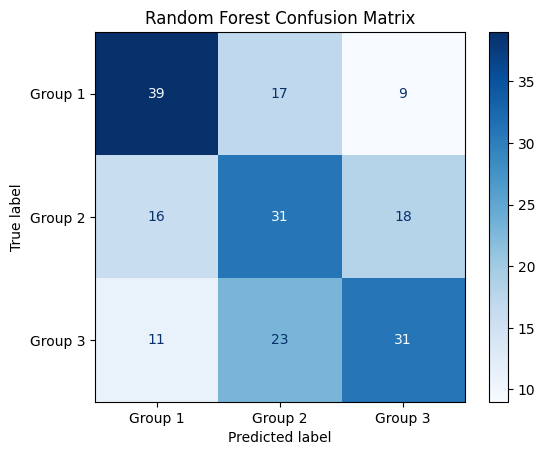

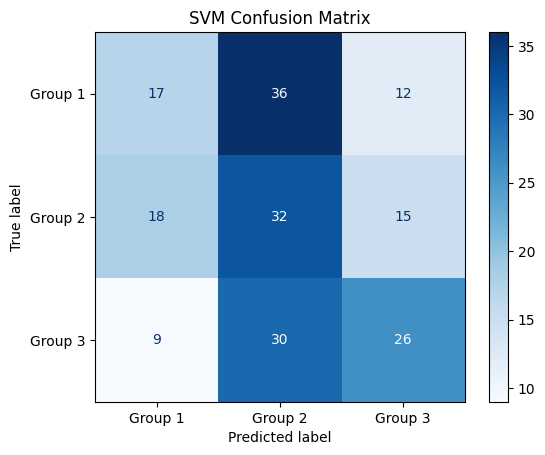

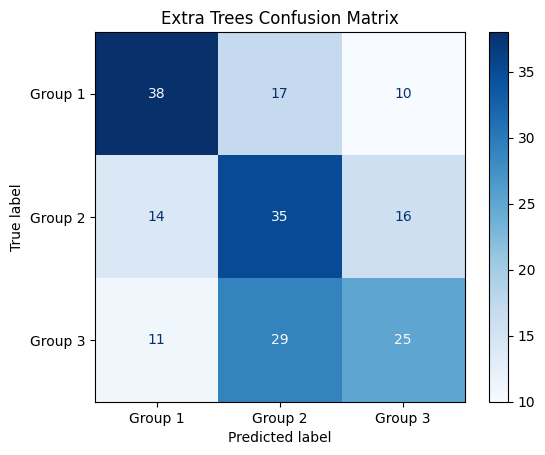

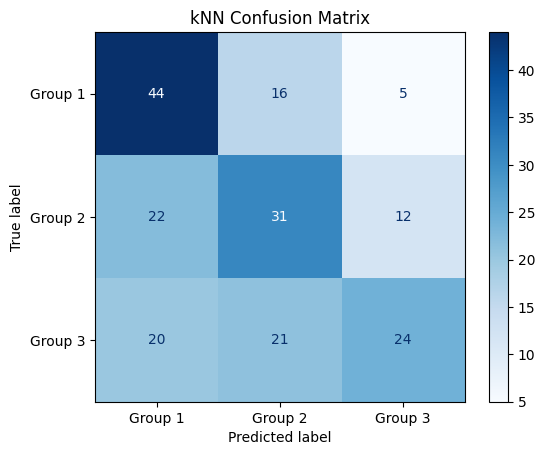

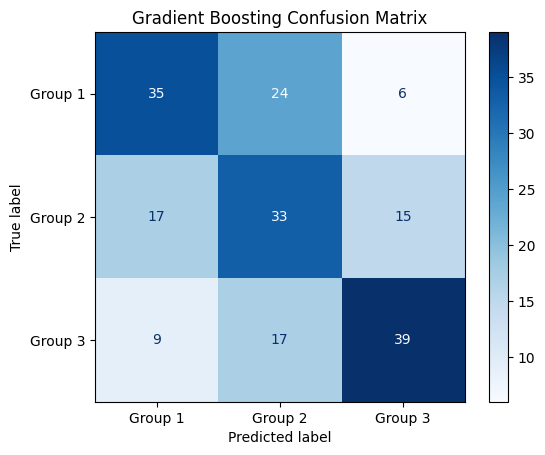

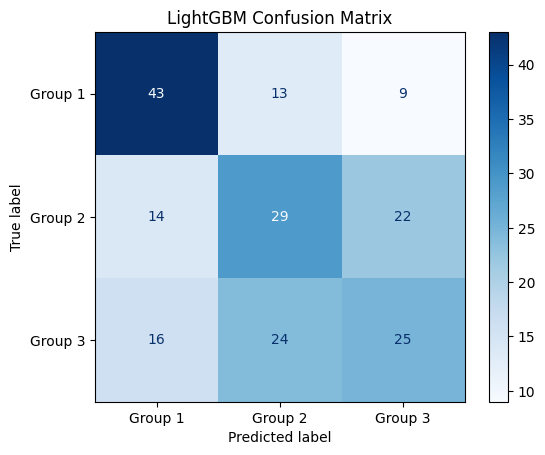

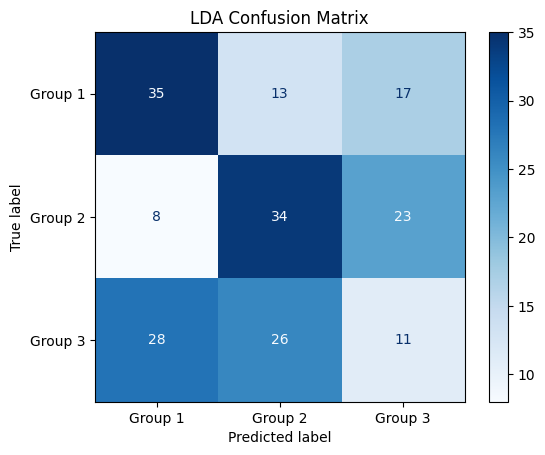

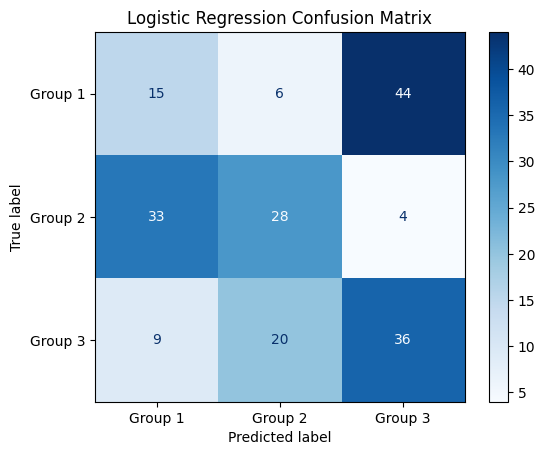

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have the true labels and predictions for each classifier stored in the following variables:
# y_true_rf, y_pred_rf
# y_true_svm, y_pred_svm
# y_true_et, y_pred_et
# y_true_knn, y_pred_knn
# y_true_gbc, y_pred_gbc
# y_true_lgbm, y_pred_lgbm
# y_true_lda, y_pred_lda
# y_true_logreg, y_pred_logreg

# y_true_rf2_all, y_pred_rf2_all
# y_true_svm2_all,  y_pred_svm2_all
# y_true_et_all, y_pred_et_all
# y_true_knn_all, y_pred_knn_all
# y_true_all_gbc, y_pred_all_gbc
# y_true_all_lgbm, y_pred_all_lgbm
# y_true_all_ldar, y_pred_all_ldar_reversed
# y_true_all_logreg, y_pred_lg_flipped

# Define the class labels
class_labels = le.classes_

# Function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Display confusion matrices for each classifier
display_confusion_matrix(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix(y_true_all_ldar, y_pred_all_ldar, 'LDA Confusion Matrix')
display_confusion_matrix(y_true_all_logregr, y_pred_all_logregr, 'Logistic Regression Confusion Matrix')


Displaying Confusion Matrices as Text Tables

In [27]:
# Function to display confusion matrix as a text table
def display_confusion_matrix_text(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(title)
    print(df_cm)
    print()

# Display confusion matrices for each classifier as text tables
display_confusion_matrix_text(y_true_rf2_all, y_pred_rf2_all, 'Random Forest Confusion Matrix')
display_confusion_matrix_text(y_true_svm2_all,  y_pred_svm2_all, 'SVM Confusion Matrix')
display_confusion_matrix_text(y_true_et_all, y_pred_et_all, 'Extra Trees Confusion Matrix')
display_confusion_matrix_text(y_true_knn_all, y_pred_knn_all, 'kNN Confusion Matrix')
display_confusion_matrix_text(y_true_all_gbc, y_pred_all_gbc, 'Gradient Boosting Confusion Matrix')
display_confusion_matrix_text(y_true_all_lgbm, y_pred_all_lgbm, 'LightGBM Confusion Matrix')
display_confusion_matrix_text(y_true_all_ldar, y_pred_all_ldar, 'LDA Confusion Matrix')
display_confusion_matrix_text(y_true_all_logreg, y_pred_all_logregr, 'Logistic Regression Confusion Matrix')


Random Forest Confusion Matrix
         Group 1  Group 2  Group 3
Group 1       39       17        9
Group 2       16       31       18
Group 3       11       23       31

SVM Confusion Matrix
         Group 1  Group 2  Group 3
Group 1       17       36       12
Group 2       18       32       15
Group 3        9       30       26

Extra Trees Confusion Matrix
         Group 1  Group 2  Group 3
Group 1       38       17       10
Group 2       14       35       16
Group 3       11       29       25

kNN Confusion Matrix
         Group 1  Group 2  Group 3
Group 1       44       16        5
Group 2       22       31       12
Group 3       20       21       24

Gradient Boosting Confusion Matrix
         Group 1  Group 2  Group 3
Group 1       35       24        6
Group 2       17       33       15
Group 3        9       17       39

LightGBM Confusion Matrix
         Group 1  Group 2  Group 3
Group 1       43       13        9
Group 2       14       29       22
Group 3       16       24  

Classification Report

In [28]:
from sklearn.metrics import classification_report

# Assuming you have these classification reports stored
# classification_report_rf = ...
# classification_report_svm = ...
# classification_report_et = ...
# classification_report_knn = ...
# classification_report_gbc = ...
# classification_report_lgbm = ...
# classification_report_lda = ...
# classification_report_logreg = ...

# Function to display classification report
def display_classification_report(report, model_name):
    print(f"Classification Report for {model_name}")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {label}")
            for metric_name, score in metrics.items():
                print(f"{metric_name}: {score}")
        else:
            print(f"{label}: {metrics}")
        print()

# Call the function for each classifier
display_classification_report(report_rf_logo, "Random Forest")
display_classification_report(report_svm1_logo, "SVM")
display_classification_report(report_et_logo, "Extra Trees")
display_classification_report(report_knn_logo, "k-Nearest Neighbors")
display_classification_report(report_gbc_logo, "Gradient Boosting Classifier")
display_classification_report(report_lgbm_logo, "LightGBM")
display_classification_report(report_ldar_logo, "Linear Discriminant Analysis")
display_classification_report(report_logregr, "Logistic Regression")


Classification Report for Random Forest
Class: Group 1
precision: 0.5909090909090909
recall: 0.6
f1-score: 0.5954198473282443
support: 65.0

Class: Group 2
precision: 0.43661971830985913
recall: 0.47692307692307695
f1-score: 0.45588235294117646
support: 65.0

Class: Group 3
precision: 0.5344827586206896
recall: 0.47692307692307695
f1-score: 0.5040650406504065
support: 65.0

accuracy: 0.517948717948718

Class: macro avg
precision: 0.5206705226132132
recall: 0.517948717948718
f1-score: 0.5184557469732757
support: 195.0

Class: weighted avg
precision: 0.5206705226132132
recall: 0.517948717948718
f1-score: 0.5184557469732758
support: 195.0

Classification Report for SVM
Class: Group 1
precision: 0.38636363636363635
recall: 0.26153846153846155
f1-score: 0.3119266055045872
support: 65.0

Class: Group 2
precision: 0.32653061224489793
recall: 0.49230769230769234
f1-score: 0.39263803680981596
support: 65.0

Class: Group 3
precision: 0.49056603773584906
recall: 0.4
f1-score: 0.4406779661016949
s